# Simplest Keras

This is an attempt to show the entire workflow of getting data to Keras, training a model, and showing its output.

### Outline:

 0. [optional logger](#0)
 1. [create a math function](#1) 
 2. [generate data](#2)
 3. [plot function](#3)
 4. [prepare data for Keras](#4)
 5. [prepare training and validation sets](#5)
 6. [perpare keras model](#6)
 7. [train model](#7)
 8. [graph results](#8)
 9. [export model](#9)
 10. [use model](#10)
 11. [graph results](#11)

#### 0

In [417]:
# optional code block
# if you want a pretty progress bar when training your model
# works in Jupyter Notebook, but may not work in Jupyter Lab

from ipywidgets import FloatProgress
from IPython.display import display

# custom callback - not required, just looks nice
from keras import callbacks

class LossHistory(callbacks.Callback):
#    def on_train_begin(self, logs={}):
#        print('Started')

    def on_epoch_end(self, batch, logs={}):
        f.value += 1

    def on_train_end(self, logs={}):
        print('Finished!')

#### 1

In [418]:
import random
import math

In [522]:
def get_data_point(x, jitter):
    preturb = (1 - random.uniform(0, jitter))
    return (math.sin(math.pi * x)) *  preturb

#### 2

In [523]:
total_data_points = 100

x_data = []
y_data = []

x_min = 0.001
x_max = 1

# optionally add noise to y output - % as decimal
y_jitter = 0

print('Generate ', total_data_points, ' pieces of data')

Generate  100  pieces of data


In [524]:
for x in range(0, total_data_points):
    rand_x = random.uniform(x_min, x_max)
    x_data.append(rand_x)
    y_data.append(get_data_point(rand_x, y_jitter))

In [525]:
x_data[:5]

[0.13586590153482822,
 0.8646670731561298,
 0.1543687957519854,
 0.13756312557123443,
 0.5403071476878243]

In [526]:
y_data[:5]

[0.4139921322842218,
 0.4124673887386164,
 0.4661763999770152,
 0.41883982756345994,
 0.991993301293504]

#### 3

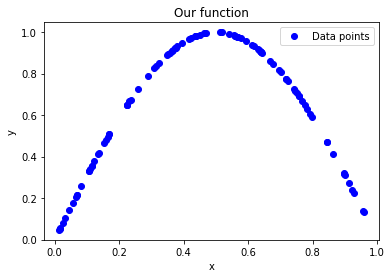

In [527]:
import matplotlib.pyplot as plt # pylint disable=E0401

plt.plot(x_data, y_data, 'bo', label='Data points')
plt.title('Our function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

#### 4

In [528]:
import numpy as np

y_data_normalized = np.zeros(total_data_points)

# normalize data
normalize_constant = np.max(y_data)

for index, element in enumerate(y_data):
    y_data_normalized[index] = element / normalize_constant

#### 5

In [529]:
x_train = x_data[:80]
y_train = y_data_normalized[:80]

x_validation = x_data[80:]
y_validation = y_data_normalized[80:]

In [530]:
type(x_train)

list

In [531]:
type(x_train[0])

float

#### 6

In [544]:
from keras import models
from keras import layers
from keras import backend

backend.clear_session()

model = models.Sequential()

model.add(layers.Dense(100, activation='tanh', input_shape=(1,)))
model.add(layers.Dense(100, activation='tanh'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='tanh'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='rmsprop',
              loss='mse', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


#### 7

In [545]:
# if you run this block multiple times, 
# you will be continuing to train the same model
# if you want to train the model from scratch
# you will have to re-run code from section 6

num_of_epochs = 200

f = FloatProgress(min=0, max=num_of_epochs)
display(f)

history = model.fit(x_train, 
                    y_train, 
                    batch_size=250, 
                    epochs=num_of_epochs,
                    # can disable the next line if desired
                    callbacks=[LossHistory()],
                    verbose=0,
                    validation_data=(x_validation, y_validation))

FloatProgress(value=0.0, max=200.0)

Finished!


#### 8

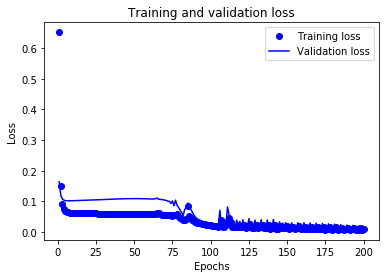

In [546]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

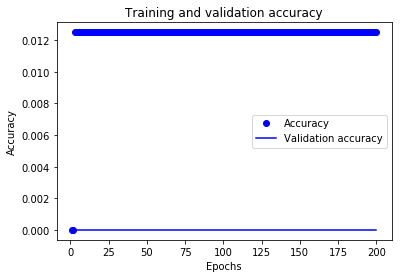

In [547]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 9

In [548]:
# uncomment before publishing
# model.save('../predict_output.h5')

#### 9

In [549]:
# uncomment before publishing
# loaded_model = models.load_model('../predict_output.h5')
loaded_model = model
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


#### 10

In [550]:
def predict_from_model(x):
    # model expects an array with a number inside
    formatted_var = [x]
    # model outputs array containing array
    return loaded_model.predict(formatted_var)[0][0]

In [551]:
predict_from_model(3)

-0.99085146

In [552]:
new_x = []
new_y = []

actual_y = []

for x in range(1, 100):
    temp_x = x_min + (x * (x_max - x_min) / 100)
    new_x.append(temp_x)
    new_y.append(predict_from_model(temp_x))
    actual_y.append(get_data_point(temp_x, 0) / normalize_constant)

In [553]:
new_x[:5]

[0.01099, 0.020980000000000002, 0.03097, 0.04096, 0.05095]

In [554]:
new_y[:5]

[0.085938945, 0.1102511, 0.1364876, 0.16453849, 0.19426286]

#### 11

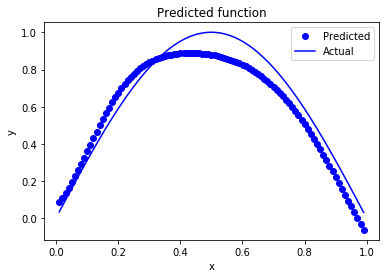

In [555]:
plt.plot(new_x, new_y, 'bo', label='Predicted')
plt.plot(new_x, actual_y, 'b', label='Actual')
plt.title('Predicted function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

#### Credits:

Created by Boris Yakubchik